## Dogs vs Cats Image Classification(without image augmentation)

### Import Packages

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import matplotlib.pyplot as plt
import numpy as np

2023-10-11 16:15:08.560080: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-11 16:15:12.006187: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-11 16:15:12.016912: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-11 16:15:29.494585: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

### Data Loading

#### Download the datasets and create the path for training and validation

In [3]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/home/login/.keras/datasets
/home/login/.keras/datasets/cats_and_dogs_filtered
/home/login/.keras/datasets/cats_and_dogs_filtered/validation
/home/login/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/home/login/.keras/datasets/cats_and_dogs_filtered/validation/cats
/home/login/.keras/datasets/cats_and_dogs_filtered/train
/home/login/.keras/datasets/cats_and_dogs_filtered/train/dogs
/home/login/.keras/datasets/cats_and_dogs_filtered/train/cats


In [4]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
print(base_dir)
train_dir = os.path.join(base_dir, 'train')
print(train_dir)
validation_dir = os.path.join(base_dir, 'validation')


train_cats_dir = os.path.join(train_dir, 'cats')
print(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print(validation_dogs_dir)

/home/login/.keras/datasets/cats_and_dogs_filtered
/home/login/.keras/datasets/cats_and_dogs_filtered/train
/home/login/.keras/datasets/cats_and_dogs_filtered/train/cats
/home/login/.keras/datasets/cats_and_dogs_filtered/validation/dogs


#### Trying to access a manually downloaded dataset from my local files

In [5]:
path = '/home/login/Documents/Intro_to_TF/cats_and_dogs_filtered/'
!find $path -type d -print

/home/login/Documents/Intro_to_TF/cats_and_dogs_filtered/
/home/login/Documents/Intro_to_TF/cats_and_dogs_filtered/validation
/home/login/Documents/Intro_to_TF/cats_and_dogs_filtered/validation/dogs
/home/login/Documents/Intro_to_TF/cats_and_dogs_filtered/validation/cats
/home/login/Documents/Intro_to_TF/cats_and_dogs_filtered/train
/home/login/Documents/Intro_to_TF/cats_and_dogs_filtered/train/dogs
/home/login/Documents/Intro_to_TF/cats_and_dogs_filtered/train/cats


In [6]:
# Define the training dataset paths
train_path = os.path.join(path, "train")
print(train_path)
train_cats_path = os.path.join(train_path, "cats")
train_dogs_path = os.path.join(train_path, "dogs")

# Define the validation dataset paths
validation_path = os.path.join(path, "validation")
print(validation_path)
validation_cats_path = os.path.join(validation_path, "cats")
validation_dogs_path = os.path.join(validation_path, "dogs")

/home/login/Documents/Intro_to_TF/cats_and_dogs_filtered/train
/home/login/Documents/Intro_to_TF/cats_and_dogs_filtered/validation


### Understanding our data

In [7]:
# Sample data
os.listdir(train_cats_path)[32:35]

['cat.760.jpg', 'cat.103.jpg', 'cat.127.jpg']

In [8]:
num_cats_train = len(os.listdir(train_cats_path))
print(f"Number of trainng cats images: {num_cats_train}")
num_dogs_train = len(os.listdir(train_dogs_path))
print(f"Number of training dogs images: {num_dogs_train}", end = "\n\n")

num_cats_val = len(os.listdir(validation_cats_path))
print(f"Number of validation cats images: {num_cats_val}")
num_dogs_val = len(os.listdir(validation_dogs_path))
print(f"Number of validation dogs images: {num_dogs_val}", end = "\n\n")

total_train = num_cats_train + num_dogs_train
total_val = num_cats_val + num_dogs_val
print(f"Total training data: {total_train}")
print(f"Total validation data: {total_val}")

Number of trainng cats images: 1000
Number of training dogs images: 1000

Number of validation cats images: 500
Number of validation dogs images: 500

Total training data: 2000
Total validation data: 1000


In [9]:
train_cats_path

'/home/login/Documents/Intro_to_TF/cats_and_dogs_filtered/train/cats'

#### Setting model parameters

In [10]:
BATCH_SIZE = 100
IMG_SHAPE = 150

### Data Preparation

In [11]:
train_image_generator = ImageDataGenerator(rescale = 1./255)
validation_image_generator = ImageDataGenerator(rescale = 1./255)

In [12]:
train_data_gen = train_image_generator.flow_from_directory(batch_size = BATCH_SIZE,
                                                          directory = train_path,
                                                          shuffle = True,
                                                          target_size = (IMG_SHAPE, IMG_SHAPE),
                                                          class_mode = 'binary')
val_data_gen = validation_image_generator.flow_from_directory(batch_size = BATCH_SIZE,
                                                             directory = validation_path,
                                                             shuffle = False,
                                                             target_size = (IMG_SHAPE, IMG_SHAPE),
                                                             class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Visualizing Training Images

In [13]:
sample_training_images, _ = next(train_data_gen)

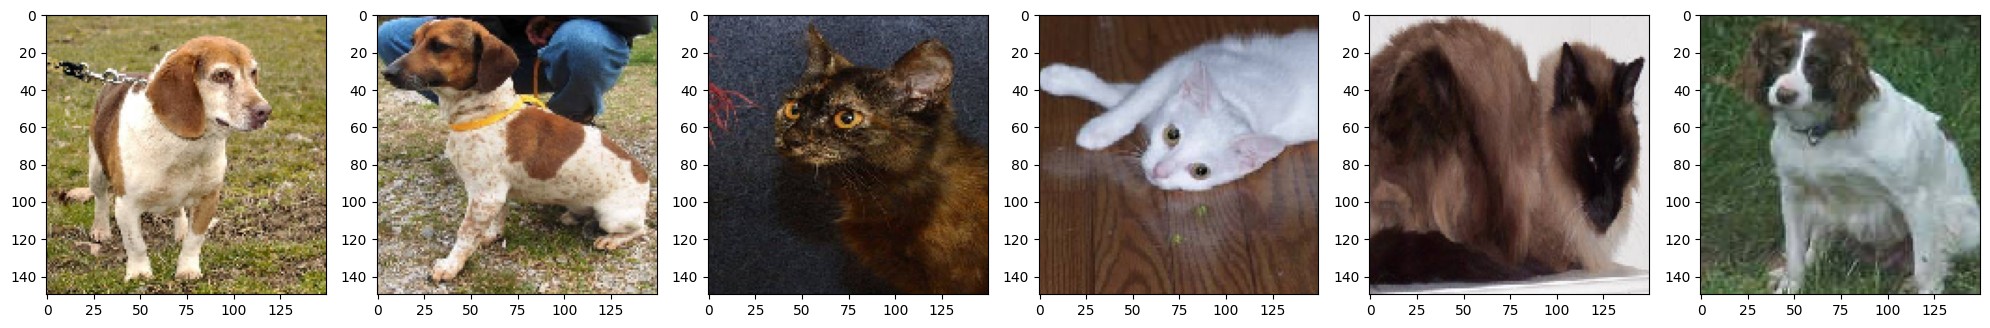

In [14]:
def plotImages(images_plot):
    fig, axes = plt.subplots(1, 6, figsize = (20, 20))
    axes = axes.flatten()
    
    for img, ax in zip(images_plot, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
    
plotImages(sample_training_images[:13])

### Model Creation
#### Define the model

In [15]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(tf.keras.layers.MaxPooling2D(2, 2))

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))

model.add(tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))

model.add(tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation = 'relu'))
model.add(tf.keras.layers.Dense(2, activation = 'relu'))

2023-10-11 16:16:21.846549: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 12845056 exceeds 10% of free system memory.
2023-10-11 16:16:21.856641: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 12845056 exceeds 10% of free system memory.
2023-10-11 16:16:21.861920: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 12845056 exceeds 10% of free system memory.


#### Compile the model

In [16]:
model.compile(optimizer = 'adam', 
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

#### Model summary

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

#### Train the model

In [23]:
from datetime import datetime
start = datetime.now()
EPOCHS = 30
history = model.fit_generator(train_data_gen, 
                             steps_per_epoch = int(np.ceil(total_train / float(BATCH_SIZE))),
                             epochs = EPOCHS, 
                             validation_data = val_data_gen,
                             validation_steps = int(np.ceil(total_val / float(BATCH_SIZE)))
        )
print("Time taken: {}".format(datetime.now() - start))

/tmp/ipykernel_3269/2750154502.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data_gen,


Epoch 1/30
20/20 [==============================] - 82s 4s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/30
20/20 [==============================] - 84s 4s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/30
20/20 [==============================] - 76s 4s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/30
20/20 [==============================] - 78s 4s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/30
20/20 [==============================] - 82s 4s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/30
20/20 [==============================] - 81s 4s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/30
20/20 [==============================] - 87s 4s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/30
20/20 [==

#### Visualizing the results

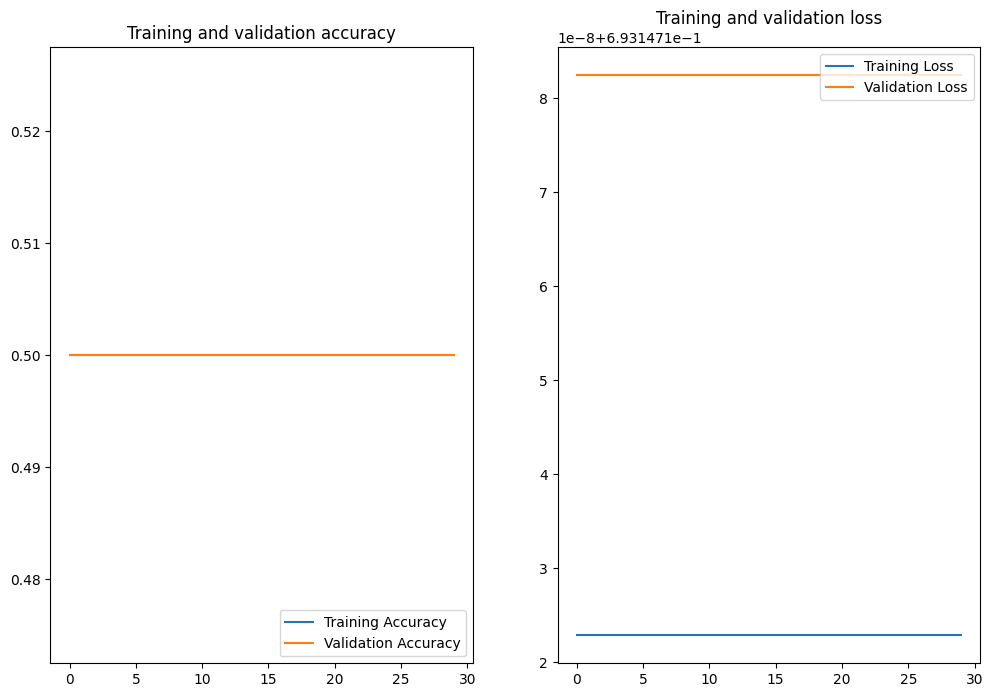

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize = (12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and validation accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and validation loss')
plt.savefig('./foo.png')
plt.show()